# Understanding the data

Dataset: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

The Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Coloums Features: 

* Invoice: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
* Price: Unit price. Numeric. Product price per unit in sterling (Â£).
* CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal. The name of the country where a customer resides.

# Data Loading

In [41]:
# import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);
data = pd.read_excel("data/online_retail_II.xlsx")
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
#take the copy of the data
df=data.copy()

### Check the general information about dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
#check null values 
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
#check unique numbers // number of unique customers or products.
df.nunique()

Invoice        28816
StockCode       4632
Description     4681
Quantity         825
InvoiceDate    25296
Price           1606
Customer ID     4383
Country           40
dtype: int64

In [9]:
#the top 5 most occured items.
df["StockCode"].value_counts().head()

85123A    3516
22423     2221
85099B    2057
21212     1933
21232     1843
Name: StockCode, dtype: int64

In [10]:
# the most ordered items
df.groupby("StockCode").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
StockCode,
21212,59411
85123A,57236
84077,54698
85099B,48376
17003,47647


In [11]:
#number of orders from different countries
df["Country"].value_counts().head()

United Kingdom    485852
EIRE                9670
Germany             8129
France              5772
Netherlands         2769
Name: Country, dtype: int64

In [12]:
#unit price*quantity of order=Total_price
df['Total_price']=df.Price*df.Quantity
df['Total_price'].head()

0     83.4
1     81.0
2     81.0
3    100.8
4     30.0
Name: Total_price, dtype: float64

In [13]:
#check which countries paid more.
df.groupby("Country").agg({"Total_price":"sum"}).sort_values("Total_price", ascending = False).head()

,Total_price
Country,
United Kingdom,8.194778e+06
EIRE,3.522427e+05
Netherlands,2.638634e+05
Germany,1.962904e+05
France,1.307699e+05


## Data Preprocessing

In [14]:
# there are null values in description and customer ID 
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
Total_price         0
dtype: int64

In [15]:
#drop null values.
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Total_price    0
dtype: int64

In [17]:
# The cancelled invoices should be removed. 
delete =  df[df["Invoice"].str.contains("C", na=False)].index
df = df.drop(delete, axis=0)

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,407695.0,13.586686,96.842229,1.0,2.00,5.00,12.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,1.25,1.95,3.75,10953.5
Customer ID,407695.0,15368.504107,1679.795700,12346.0,13997.00,15321.00,16812.00,18287.0
Total_price,407695.0,21.663261,77.147356,0.0,4.95,11.90,19.50,15818.4


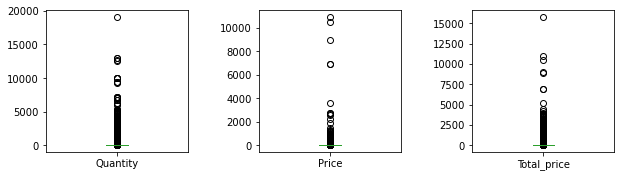

In [36]:
#check outliers in non unique coloumns.
df2 = df.drop(columns=['Customer ID', 'Invoice']) 
df2.plot(subplots=True, layout=(4,4), kind='box', figsize=(14,12), patch_artist=True)
plt.subplots_adjust(wspace=0.5)

# Customer Segmentation Using RFM Analysis

RFM stands for Recency, Frequency, Monetary Value. The RFM analysis is the technique of customer segmentation based on their transaction history. It allows us to collect insights about consumer behaviour and optimize marketing strategy accordingly. In particular, one can leverage RFM to create personalized special offers to improve sales and decrease customer retention.

The RFM analysis is based on three metrics, which measure different (but equally important) customer characteristics: How much time passed since the last purchase? (Recency), How many transactions were made? (Frequency), and How much money was spent?(Monetary Value). [1]

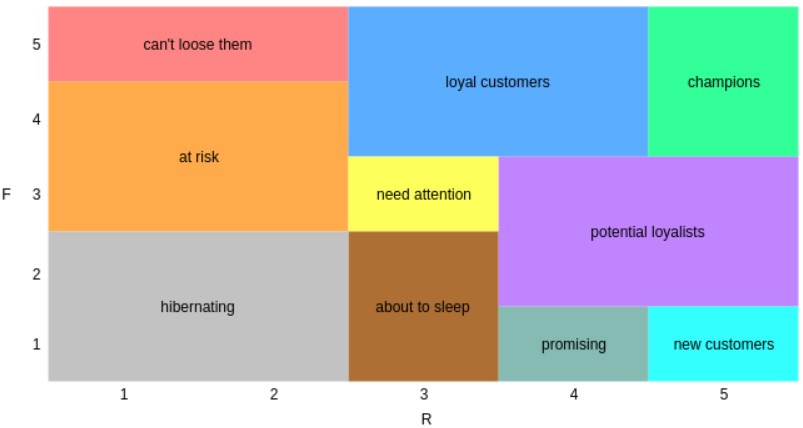

## Recency

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
 8   Total_price  407695 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB


In [40]:
df["InvoiceDate"].max()
# This is the last transaction date

Timestamp('2010-12-09 20:01:00')

In [42]:
#arrange today_date as 1 day later than the last transaction date
today_date = dt.datetime(2011,12,10)

In [43]:
# the last transaction dates for each customer
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346.0,2010-06-28 13:53:00
12347.0,2010-12-07 14:57:00
12348.0,2010-09-27 14:59:00
12349.0,2010-10-28 08:23:00
12351.0,2010-11-29 15:23:00


In [58]:
#Calculate recency values for each customer based on their unique ID's.
recency = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days})
recency.rename(columns={"InvoiceDate": "Recency"}, inplace = True)
recency.head()

,Recency
Customer ID,
12346.0,529
12347.0,367
12348.0,438
12349.0,407
12351.0,375


## Frequency

The Frequency can be determined as "How many transactions were made?". 

Since Invoice determined as A 6-digit integral number uniquely assigned to each transaction, we need to count number of unique transactions. 

In [61]:
frequency = df.groupby('Customer ID').agg({'Invoice': lambda num: num.nunique()})
frequency.rename(columns={"Invoice": "Frequency"}, inplace = True)
frequency.head()

,Frequency
Customer ID,
12346.0,11
12347.0,2
12348.0,1
12349.0,3
12351.0,1


## Monetary

The Monetary can be determined as "How much money was spent?"

We need to use the coloumn Total_price determined as quantity*price for each customer. 

In [63]:
monetary = df.groupby('Customer ID').agg({'Total_price': lambda Total_price: Total_price.sum()})
monetary.rename(columns={"Total_price": "Monetary"}, inplace = True)
monetary.head()

,Monetary
Customer ID,
12346.0,372.86
12347.0,1323.32
12348.0,222.16
12349.0,2671.14
12351.0,300.93


In [106]:
#add customer id coloumn
customer_id=df["Customer ID"]

# RFM 

In [109]:
# Concatenate 3 coloumns
RFM = pd.concat([recency, frequency, monetary], axis = 1)
RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,529,11,372.86
12347.0,367,2,1323.32
12348.0,438,1,222.16
12349.0,407,3,2671.14
12351.0,375,1,300.93


# Assigning RFM scores

The quantiles method was used to score each customer based on transaction characteristics.
We rank the customers using the chosen metric from the best to the worst one, then divide ranked customers into groups of equal sizes and assign each group a score. 
* Divide all the score into 5 categories with qcut function where 5 is the best and 1 is the worst.

In [73]:
# For Recency and Monetary 
RFM["Recency_score"] = pd.qcut(RFM['Recency'], 5, labels=[5, 4, 3, 2, 1])
# divide 5 quantiles where the lower recency is the best which means that customer recently made a purchase. 

RFM["Monetary_score"] = pd.qcut(RFM['Monetary'], 5, labels=[1, 2, 3, 4, 5])
# divide 5 quantiles where the higher monetary is the best that means that sum of total_price is the highest.

RFM["Frequency_score"] = pd.qcut(RFM['Frequency'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
# divide 5 quantiles where the higher frequency is the best that means that customer is frequently purchasing items.
# In frequency there are duplicate values, so rank these as the most recent transaction is the best one.

In [74]:
RFM.head()

,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score
Customer ID,,,,,,
12346.0,529,11,372.86,2,2,5
12347.0,367,2,1323.32,5,4,2
12348.0,438,1,222.16,2,1,1
12349.0,407,3,2671.14,3,5,3
12351.0,375,1,300.93,5,2,1


In [81]:
#add RFM score
RFM["RFM_SCORE"] = (RFM['Recency_score'].astype(str) + RFM['Frequency_score'].astype(str) + RFM['Monetary_score'].astype(str))

In [82]:
RFM.head()

,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,RFM_SCORE
Customer ID,,,,,,,
12346.0,529,11,372.86,2,2,5,252
12347.0,367,2,1323.32,5,4,2,524
12348.0,438,1,222.16,2,1,1,211
12349.0,407,3,2671.14,3,5,3,335
12351.0,375,1,300.93,5,2,1,512


## Customer Segment Table

In [83]:
Cust_seg = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

Depending on the nature of our businesses, we might increase or decrease the relative importance of each RFM variable to arrive at the final score. 

**In a retail business selling fashion/cosmetics, a customer who searches and purchases products every month will have a higher recency and frequency score than monetary score. Accordingly, the RFM score could be calculated by giving more weight to R and F scores than M.** [2]

In [87]:
RFM['Segment'] = RFM['Recency_score'].astype(str) + RFM['Frequency_score'].astype(str)
RFM['Segment'] = RFM['Segment'].replace(Cust_seg, regex=True)
RFM.head()

,Recency,Frequency,Monetary,Recency_score,Monetary_score,Frequency_score,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,529,11,372.86,2,2,5,252,Cant_Loose
12347.0,367,2,1323.32,5,4,2,524,Potential_Loyalists
12348.0,438,1,222.16,2,1,1,211,Hibernating
12349.0,407,3,2671.14,3,5,3,335,Need_Attention
12351.0,375,1,300.93,5,2,1,512,New_Customers


In [92]:
#Statistics based on Segments
RFM[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count", "min", "median", "max"])

Recency                         Frequency            \
                           mean count  min median  max       mean count min   
Segment                                                                       
About_to_Sleep       417.819242   343  401  417.0  435   1.201166   343   1   
At_Risk              516.158756   611  436  495.0  736   3.073650   611   2   
Cant_Loose           488.116883    77  436  473.0  662   9.116883    77   6   
Champions            371.119155   663  365  371.0  379  12.553544   663   3   
Hibernating          578.057030  1017  436  577.0  738   1.125860  1017   1   
Loyal_Customers      400.287062   742  380  395.0  435   6.830189   742   3   
Need_Attention       417.265700   207  401  417.0  435   2.449275   207   2   
New_Customers        372.580000    50  365  372.5  379   1.000000    50   1   
Potential_Loyalists  382.793037   517  365  383.0  400   2.017408   517   1   
Promising            389.747126    87  380  389.0  400   1.000000    87   1   

                                    Monetary                          \
                    median  max         mean count     min    median   
Segment                                                                
About_to_Sleep           1    2   441.320000   343   24.40   317.760   
At_Risk                  3    6  1188.878316   611   24.05   760.190   
Cant_Loose               7   46  4099.450000    77  181.35  2322.590   
Champions                8  205  6852.264167   663   75.76  2508.320   
Hibernating              1    2   403.183386  1017    0.00   250.260   
Loyal_Customers          5   42  2746.067353   742   97.40  1821.385   
Need_Attention           2    3  1060.357005   207  101.10   742.900   
New_Customers            1    1   386.199200    50   35.40   258.825   
Potential_Loyalists      2    3   729.510986   517   10.95   524.650   
Promising                1    1   367.086782    87   30.30   293.740   

                                
                           max  
Segment                         
About_to_Sleep         3502.48  
At_Risk               34095.26  
Cant_Loose            26286.75  
Champions            349164.35  
Hibernating           11880.84  
Loyal_Customers       50291.38  
Need_Attention        13544.99  
New_Customers          2945.38  
Potential_Loyalists   12079.99  
Promising              2389.62

# References

[1]: https://neurosys.com/article/rfm-analysis-for-customer-segmentation/
[2]: https://clevertap.com/blog/rfm-analysis/

In [110]:
#[1]: https://neurosys.com/article/rfm-analysis-for-customer-segmentation/
#[2]: https://clevertap.com/blog/rfm-analysis/
#https://www.kaggle.com/mashlyn/online-retail-ii-uci